In [1]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SIRModel():
    """
    Cette classe représente une modélisation SIR épidémiologique.
    Les paramètres du modèles sont beta et gamma dont les valeurs initiales sont données à
    l'instanciation de la classe.
    
    beta = taux de contact (vitesse de la propagation de la maladie)
    gamma = moyenne de temps de guérison (vitesse de guérison de la maladie)
    """
    def __init__(self, beta_init=0.1, gamma_init=0.3):
        self.beta_0 = beta_init
        self.gamma_0 = gamma_init
        self.beta_ = None
        self.gamma_ = None


    def fit(self, X, y):
        """
        Ajuste les paramètres beta et gamma du modèle sur le jeu de données d'entrée.
        
        Returns:
            self for method chaining.
        """
        self.beta_ = self.beta_0
        self.gamma_ = self.gamma_0
        return self


    def predict(self, t):
        """
        Predict the S I R values for given time
        TODO : defines values
        """
        if self.beta_ is None or self.gamma_ is None:
            raise Exception("SIRModel not fitted")
        return S, I, R
    
    
    def deriv(self, y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

In [9]:
df = pd.read_csv("data/covid/france/evolution_par_jour.csv", sep=",")
df.tail()

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,gueris,depistes,source_nom,source_url,source_archive,source_type,susceptible
73,2020-05-08,pays,FRA,France,138421.0,72548.0,34890.0,NaN,16497.0,9733.0,2868.0,22724.0,55782.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66789300.0
74,2020-05-09,pays,FRA,France,138854.0,72850.0,35046.0,NaN,16573.0,9737.0,2812.0,22614.0,56038.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788535.0
75,2020-05-10,pays,FRA,France,139063.0,73143.0,35236.0,NaN,16642.0,9738.0,2776.0,22569.0,56217.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788078.0
76,2020-05-11,pays,FRA,France,139519.0,73099.0,35195.0,NaN,16820.0,9823.0,2712.0,22284.0,56724.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66786937.0
77,2020-05-12,pays,FRA,France,140227.0,73435.0,35437.0,NaN,17003.0,9988.0,2542.0,21595.0,57785.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66784985.0


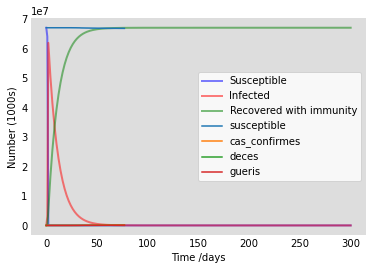

In [88]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = df.iloc[0]["susceptible"]
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 15, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 300, 300)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
df[["susceptible", "cas_confirmes", "deces", "gueris"]].plot(ax=ax)

plt.show()

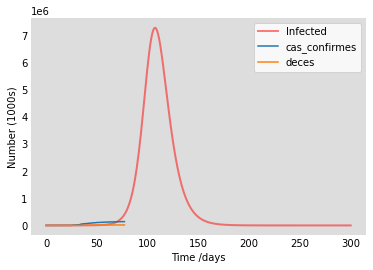

In [105]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = df.iloc[0]["susceptible"]
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 4, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 0.2
# A grid of time points (in days)
t = np.linspace(0, 300, 300)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
df[["cas_confirmes", "deces"]].plot(ax=ax)

plt.show()